<a href="https://practicalai.me"><img src="https://raw.githubusercontent.com/practicalAI/images/master/images/rounded_logo.png" width="100" align="left" hspace="20px" vspace="20px"></a>

<img src="https://raw.githubusercontent.com/practicalAI/images/master/basic_ml/07_Data_and_Models/nutshell.png" width="250" vspace="35px" align="right">

<div align="left">
<h1>Data and Models</h1>

In the subsequent lessons, we will continue to learn deep learning. But we've ignored a fundamental concept about data and modeling: quality and quantity.
    
    多层神经元传感处理步骤：
        1.载入参数与数据
        2.数据预处理
        3.建立训练、测试和验证集
        4.输入数据标准化
        5.建模
        6.模型训练
        7.评估
        8.边界可视化
        9.推断校验

<table align="center">
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/rounded_logo.png" width="25"><a target="_blank" href="https://practicalai.me"> View on practicalAI</a>
  </td>
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/colab_logo.png" width="25"><a target="_blank" href="https://colab.research.google.com/github/practicalAI/practicalAI/blob/master/notebooks/07_Data_and_Models.ipynb"> Run in Google Colab</a>
  </td>
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/github_logo.png" width="22"><a target="_blank" href="https://github.com/practicalAI/practicalAI/blob/master/notebooks/basic_ml/07_Data_and_Models.ipynb"> View code on GitHub</a>
  </td>
</table>

# Set up

<img height="45" src="http://bestanimations.com/HomeOffice/Lights/Bulbs/animated-light-bulb-gif-29.gif" align="left" vspace="15px" hspace="10px">

In a nutshell, a machine learning model consumes input data and produces predictions. The quality of the predictions directly corresponds to the quality and quantity of data you train the model with; **garbage in, garbage out**. Check out this [VentureBeat article](https://venturebeat.com/2018/06/30/understanding-the-practical-applications-of-business-ai/) on where it makes sense to use AI and how to properly apply it.

We're going to go through all the concepts with concrete code examples and some synthesized data to train our models on. The task is to determine whether a tumor will be benign (harmless) or malignant (harmful) based on leukocyte (white blood cells) count and blood pressure. This is a synethic dataset that we created and has no clinical relevance.

In [3]:
# Use TensorFlow 2.x
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [6]:
import os
import numpy as np
import tensorflow as tf

In [7]:
# Arguments
SEED = 1234
DATA_FILE = 'tumors.csv'
REDUCED_DATA_FILE = 'tumors_reduced.csv'
SHUFFLE = True
TRAIN_SIZE = 0.70
VAL_SIZE = 0.15
TEST_SIZE = 0.15
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_DIM = 100
LEARNING_RATE = 1e-3

In [8]:
# Set seed for reproducability
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Data

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import urllib

### Operations

In [10]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/practicalAI/practicalAI/master/data/tumors.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(DATA_FILE, 'wb') as fp:
    fp.write(html)

In [11]:
# Raw data
df = pd.read_csv(DATA_FILE, header=0)
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [12]:
# Define X and y
X = df[['leukocyte_count', 'blood_pressure']].values
y = df['tumor_class'].values

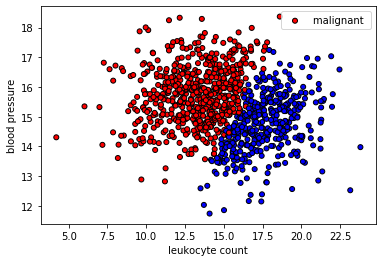

In [13]:
# Plot data
colors = {'benign': 'blue', 'malignant': 'red'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel('leukocyte count')
plt.ylabel('blood pressure')
plt.legend(['malignant ', 'benign'], loc="upper right")
plt.show()

We want to choose features that have strong predictive signal for our task. If you want to improve performance, you need to continuously do feature engineering by collecting and adding new signals. So you may run into a new feature that has high correlation (orthogonal signal) with your existing features but it may still possess som unique signal to boost your predictive performance. 

,leukocyte_count,blood_pressure
leukocyte_count,1.000000,-0.162875
blood_pressure,-0.162875,1.000000


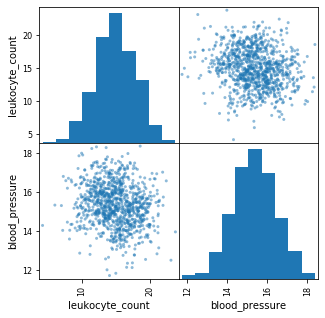

In [14]:
# Correlation matrix
scatter_matrix(df, figsize=(5, 5));
df.corr()

# Split data

In [15]:
import collections
import json
from sklearn.model_selection import train_test_split

### Components

In [16]:
def train_val_test_split(X, y, val_size, test_size, shuffle):
    """Split data into train/val/test datasets.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

### Operations

In [17]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)
class_counts = dict(collections.Counter(y))
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"X_train[0]: {X_train[0]}")
print (f"y_train[0]: {y_train[0]}")
print (f"Classes: {class_counts}")

X_train: (722, 2), y_train: (722,)
X_val: (128, 2), y_val: (128,)
X_test: (150, 2), y_test: (150,)
X_train[0]: [18.01865938 15.48133647]
y_train[0]: benign
Classes: {'malignant': 611, 'benign': 389}


# Label encoder

In [18]:
import json
from sklearn.preprocessing import LabelEncoder

In [19]:
# Output vectorizer
y_tokenizer = LabelEncoder()

In [20]:
# Fit on train data
y_tokenizer = y_tokenizer.fit(y_train)
print (f"classes: {y_tokenizer.classes_}")

classes: ['benign' 'malignant']


In [21]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = y_tokenizer.transform(y_train)
y_val = y_tokenizer.transform(y_val)
y_test = y_tokenizer.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: benign
y_train[0]: 0


In [22]:
# Class weights
counts = collections.Counter(y_train)
class_weights = {_class: 1.0/count for _class, count in counts.items()}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: Counter({1: 441, 0: 281}),
class weights: {0: 0.0035587188612099642, 1: 0.0022675736961451248}


# Standardize data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

In [25]:
# Apply scaler on training and test data (don't standardize outputs for classification)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_val = X_scaler.transform(X_val)
standardized_X_test = X_scaler.transform(X_test)

In [26]:
# Check
print (f"standardized_X_train: mean: {np.mean(standardized_X_train, axis=0)[0]}, std: {np.std(standardized_X_train, axis=0)[0]}")
print (f"standardized_X_val: mean: {np.mean(standardized_X_val, axis=0)[0]}, std: {np.std(standardized_X_val, axis=0)[0]}")
print (f"standardized_X_test: mean: {np.mean(standardized_X_test, axis=0)[0]}, std: {np.std(standardized_X_test, axis=0)[0]}")

standardized_X_train: mean: 3.938600753633857e-15, std: 0.9999999999999998
standardized_X_val: mean: 0.06571155649025341, std: 0.9625041074006321
standardized_X_test: mean: -0.09679265967370689, std: 0.9864056087200104


# Model

Let's fit a model on this synthetic data.

In [27]:
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model

### Components

In [28]:
# MLP
class MLP(Model):
    def __init__(self, hidden_dim, num_classes):
        super(MLP, self).__init__()
        self.fc1 = Dense(units=hidden_dim, activation='relu')
        self.fc2 = Dense(units=num_classes, activation='softmax')
        
    def call(self, x_in, training=False):
        """Forward pass."""
        z = self.fc1(x_in)
        y_pred = self.fc2(z)
        return y_pred
    
    def sample(self, input_shape):
        x_in = Input(shape=input_shape)
        return Model(inputs=x_in, outputs=self.call(x_in)).summary()

In [29]:
def plot_multiclass_decision_boundary(model, X, y, savefig_fp=None):
    """Plot the multiclass decision boundary for a model that accepts 2D inputs.

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
    """
    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Create predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]  #按行相加
    y_pred = model.predict(x_in)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot
    if savefig_fp:
        plt.savefig(savefig_fp, format='png')

### Operations

In [30]:
# Model Arguments
INPUT_DIM = X_train.shape[-1]
NUM_CLASSES = len(df.tumor_class.unique())

In [31]:
# Initialize the model
model = MLP(hidden_dim=HIDDEN_DIM,
            num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile
model.compile(optimizer=Adam(lr=LEARNING_RATE),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [33]:
class_weights

{0: 0.0035587188612099642, 1: 0.0022675736961451248}

In [34]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 722 samples, validate on 128 samples
Epoch 1/5
722/722 [==============================] - 0s 600us/sample - loss: 0.0016 - accuracy: 0.7008 - val_loss: 0.0014 - val_accuracy: 0.7812
Epoch 2/5
722/722 [==============================] - 0s 73us/sample - loss: 0.0012 - accuracy: 0.8864 - val_loss: 0.0011 - val_accuracy: 0.8359
Epoch 3/5
722/722 [==============================] - 0s 110us/sample - loss: 8.6852e-04 - accuracy: 0.9072 - val_loss: 8.7229e-04 - val_accuracy: 0.8672
Epoch 4/5
722/722 [==============================] - 0s 81us/sample - loss: 6.7633e-04 - accuracy: 0.9321 - val_loss: 7.1961e-04 - val_accuracy: 0.8828
Epoch 5/5
722/722 [==============================] - 0s 63us/sample - loss: 5.4061e-04 - accuracy: 0.9571 - val_loss: 6.0240e-04 - val_accuracy: 0.9219


In [35]:
# Predictions
pred_train = model.predict(standardized_X_train) 
pred_test = model.predict(standardized_X_test)
print (f"sample probability: {pred_test[0]}")
pred_train = np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
print (f"sample class: {pred_test[0]}")

sample probability: [0.21060394 0.78939605]
sample class: 1


In [36]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.96, test acc: 0.93


We're going to plot a white point, which we know belongs to the malignant tumor class. Our well trained model here would accurately predict that it is indeed a malignant tumor!

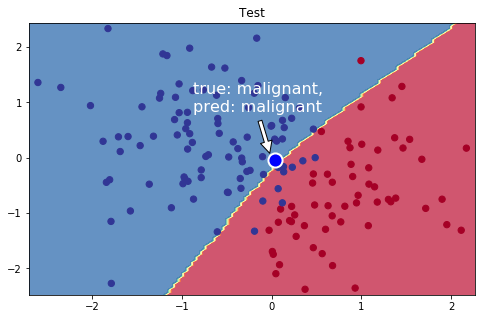

In [43]:
# Visualize the decision boundary
plt.figure(figsize=(8,5))
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)

# Sample point near the decision boundary
mean_leukocyte_count, mean_blood_pressure = X_scaler.transform(
    [[np.mean(df.leukocyte_count), np.mean(df.blood_pressure)]])[0]
plt.scatter(mean_leukocyte_count+0.05, mean_blood_pressure-0.05, s=200, 
            c='b', edgecolor='w', linewidth=2)

# Annotate
plt.annotate('true: malignant,\npred: malignant',
             color='white',
             xy=(mean_leukocyte_count, mean_blood_pressure),
             xytext=(0.4, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='white', shrink=0.1)
            )
plt.show()

Great! We received great performances on both our train and test data splits. We're going to use this dataset to show the importance of data quality and quantity.

# Data quality and quantity

Let's remove some training data near the decision boundary and see how robust the model is now.

In [53]:
# Upload data from GitHub to notebook's local drive
url1 = "https://raw.githubusercontent.com/practicalAI/practicalAI/master/data/tumors_reduced.csv"
response1 = urllib.request.urlopen(url1)
html1 = response1.read()
with open(REDUCED_DATA_FILE, 'wb') as fp:
    fp.write(html1)

In [54]:
# Raw reduced data
df_reduced = pd.read_csv(REDUCED_DATA_FILE, header=0)
df_reduced.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [55]:
# Define X and y
X = df_reduced[['leukocyte_count', 'blood_pressure']].values
y = df_reduced['tumor_class'].values

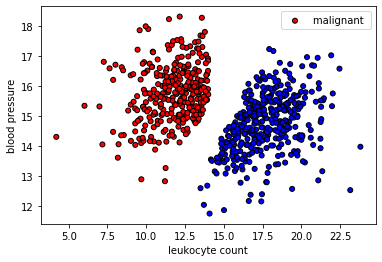

In [57]:
# Plot data
colors = {'benign': 'blue', 'malignant': 'red'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel('leukocyte count')
plt.ylabel('blood pressure')
plt.legend(['malignant ', 'benign'], loc="upper right")
plt.show()

In [58]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X, y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)
class_counts = dict(collections.Counter(y_train))
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"X_train[0]: {X_train[0]}")
print (f"y_train[0]: {y_train[0]}")
print (f"Classes: {class_counts}")

X_train: (520, 2), y_train: (520,)
X_val: (92, 2), y_val: (92,)
X_test: (108, 2), y_test: (108,)
X_train[0]: [14.4110029  13.14842457]
y_train[0]: benign
Classes: {'benign': 281, 'malignant': 239}


In [59]:
# Encode class labels
y_tokenizer = LabelEncoder()
y_tokenizer = y_tokenizer.fit(y_train)
num_classes = len(y_tokenizer.classes_)
y_train = y_tokenizer.transform(y_train)
y_val = y_tokenizer.transform(y_val)
y_test = y_tokenizer.transform(y_test)

In [60]:
# Class weights
counts = collections.Counter(y_train)
class_weights = {_class: 1.0/count for _class, count in counts.items()}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: Counter({0: 281, 1: 239}),
class weights: {0: 0.0035587188612099642, 1: 0.0041841004184100415}


In [61]:
# Standardize inputs using training data
X_scaler = StandardScaler().fit(X_train)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_val = X_scaler.transform(X_val)
standardized_X_test = X_scaler.transform(X_test)

In [62]:
# Initialize the model
model = MLP(hidden_dim=HIDDEN_DIM,
            num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile
model.compile(optimizer=Adam(lr=LEARNING_RATE),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [64]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          validation_data=(standardized_X_val, y_val),
          shuffle=False,
          class_weight=class_weights,
          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 520 samples, validate on 92 samples
Epoch 1/5
520/520 [==============================] - 0s 949us/sample - loss: 0.0024 - accuracy: 0.8615 - val_loss: 0.0020 - val_accuracy: 0.9239
Epoch 2/5
520/520 [==============================] - 0s 94us/sample - loss: 0.0017 - accuracy: 0.9942 - val_loss: 0.0016 - val_accuracy: 0.9457
Epoch 3/5
520/520 [==============================] - 0s 86us/sample - loss: 0.0012 - accuracy: 0.9981 - val_loss: 0.0012 - val_accuracy: 0.9674
Epoch 4/5
520/520 [==============================] - 0s 73us/sample - loss: 8.8105e-04 - accuracy: 0.9981 - val_loss: 9.2301e-04 - val_accuracy: 0.9674
Epoch 5/5
520/520 [==============================] - 0s 78us/sample - loss: 6.4092e-04 - accuracy: 0.9981 - val_loss: 7.2682e-04 - val_accuracy: 0.9674


In [65]:
# Predictions
pred_train = model.predict(standardized_X_train) 
pred_test = model.predict(standardized_X_test)
print (f"sample probability: {pred_test[0]}")
pred_train = np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
print (f"sample class: {pred_test[0]}")

sample probability: [0.97589797 0.02410205]
sample class: 0


In [66]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 1.00, test acc: 1.00


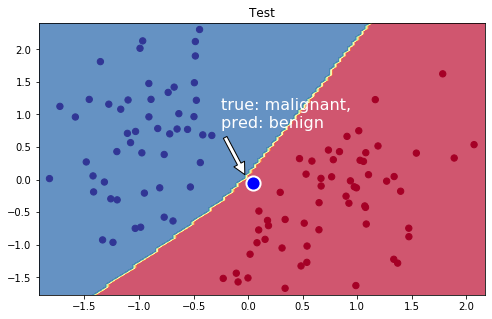

In [67]:
# Visualize the decision boundary
plt.figure(figsize=(8,5))
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)

# Sample point near the decision boundary (same point as before)
plt.scatter(mean_leukocyte_count+0.05, mean_blood_pressure-0.05, s=200, 
            c='b', edgecolor='w', linewidth=2)

# Annotate
plt.annotate('true: malignant,\npred: benign',
             color='white',
             xy=(mean_leukocyte_count, mean_blood_pressure),
             xytext=(0.45, 0.60),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='white', shrink=0.1)
            )
plt.show()

This is a very scary but highly realistic scenario. Based on our reduced synthetic dataset, we have achieved a model that generalized really well on the test data. But when we ask for the prediction for the same point tested earlier (which we known is malignant), the prediction is now a benign tumor. We would have completely missed the tumor. To mitigate this, we can:
1. get more data around the space we are concerned about
2. consume predictions with caution when they are close to the decision boundary

<img height="45" src="http://bestanimations.com/HomeOffice/Lights/Bulbs/animated-light-bulb-gif-29.gif" align="left" vspace="15px" hspace="10px">

**MODELS ARE NOT CRYSTAL BALLS** 
It's so important that before any machine learning, we really look at our data and ask ourselves if it is truly representative for the task we want to solve. The model itself may fit really well and generalize well on your data but if the data is of poor quality to begin with, the model cannot be trusted.

# Models

Once you are confident that your data is of good quality and quantity, you can finally start thinking about modeling. The type of model you choose depends on many factors, including the task, type of data, complexity required, etc. 

<img src="https://raw.githubusercontent.com/practicalAI/images/master/basic_ml/07_Data_and_Models/models.png" width="500">

So once you figure out what type of model your task needs, start with simple models and then slowly add complexity. You don’t want to start with neural networks right away because that may not be right model for your data and task. Striking this balance in model complexity is one of the key tasks of your data scientists. **simple models → complex models**



---
<div align="center">

Subscribe to our <a href="https://practicalai.me/#newsletter">newsletter</a> and follow us on social media to get the latest updates!

<a class="ai-header-badge" target="_blank" href="https://github.com/practicalAI/practicalAI">
              <img src="https://img.shields.io/github/stars/practicalAI/practicalAI.svg?style=social&label=Star"></a>&nbsp;
            <a class="ai-header-badge" target="_blank" href="https://www.linkedin.com/company/practicalai-me">
              <img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
            <a class="ai-header-badge" target="_blank" href="https://twitter.com/practicalAIme">
              <img src="https://img.shields.io/twitter/follow/practicalAIme.svg?label=Follow&style=social">
            </a>
              </div>

</div>